In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.special as sc

In [2]:
def simple_sampling_rw(max_samples,max_length):
    
    """Produce multiple, max_length + 1, distributions of one-dimensional unbiased random walks 
   based on the total number of steps to the right.
   
   Parameters
   ----------
   max_length: maximum length of the walk
   max_samples: total number of samples
   
   Returns
   -------
   A square matrix s, where the k-th column is the number of steps to the right and the n-th row is 
   the total length of the random walk, both from 0 to max_length + 1. Each entry s[n,k] is the number of samples
   that took k steps to the right in a random walk of n steps.
    """
    
    # Initialise a zero matrix where each entry represents the number of samples with k steps to the right.
    s = np.zeros((max_length+1,max_length+1))
    # Iterate over the number of stationary (n = 0) random walk samples with zero steps to the right (k = 0)
    # until in reaches the maximum number of samples.
    while s[0,0] < max_samples:
        s[0,0] += 1
        # Intialise n and k to represent the total length and total number of steps to the right respectively.
        n = k = 0 
        while n < max_length:
            n += 1
           # Generate a random number between 0 and 1.
            r = random.random()
            if r < 1/2:
                k += 1
                # Add 1 to represent moving the right with a chance of 1/2.
            else:
                # Not adding 1 represents moving to the left.
                pass
            # Fill the corresponding sample entry.
            s[n,k] += 1
            
    return s

# example
max_samples,max_length = 10 ** 4,8
s = simple_sampling_rw(max_samples,max_length)
print(s)

[[10000.     0.     0.     0.     0.     0.     0.     0.     0.]
 [ 4930.  5070.     0.     0.     0.     0.     0.     0.     0.]
 [ 2433.  5026.  2541.     0.     0.     0.     0.     0.     0.]
 [ 1209.  3725.  3782.  1284.     0.     0.     0.     0.     0.]
 [  605.  2429.  3843.  2486.   637.     0.     0.     0.     0.]
 [  309.  1526.  3109.  3200.  1517.   339.     0.     0.     0.]
 [  154.   929.  2346.  3184.  2312.   907.   168.     0.     0.]
 [   84.   520.  1639.  2768.  2752.  1634.   516.    87.     0.]
 [   48.   282.  1095.  2163.  2769.  2203.  1091.   307.    42.]]


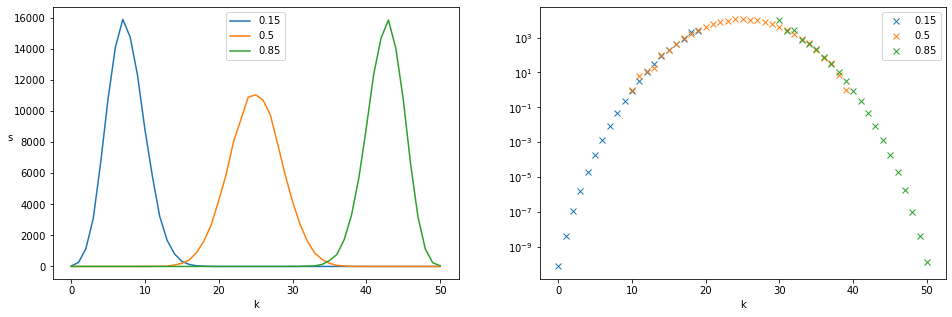

In [3]:
def biased_sampling_rw(p,max_samples,max_length):
    
    """Produce multiple, max_length + 1, distributions of biased one-dimensional random walks 
    based on the total number of steps to the right.
    
    Parameters
    ----------
    p: the probability moving to the right 
    max_length: total length of the walk
    max_samples: total number of samples
    
    Returns
    -------
    Two matrices:
    
    The square matrix s, where the k-th column is the number of steps to the right and the n-th row is 
    the total length of the random walk, both from 0 to max_length + 1. Each entry s[n,k] is the number of samples
    that took k steps to the right in a random walk of n steps.
    
    The w matrix, containing the corresponding weights for the sample entry s[n,k].
    """

    # Initialise two zero matrices, s and w
    # where each entry represents the number of samples with k step to the right
    # and w contains the corresponding weights.
    s = np.zeros((max_length+1,max_length+1))
    w = np.zeros((max_length+1,max_length+1))
    # Iterate over the number of stationary (n = 0) random walk samples with zero steps to the right (k = 0)
    # until in reaches the maximum number of samples.
    while s[0,0] < max_samples:
        s[0,0] += 1
        # Intialise n and k to represent the total length and total number of steps to the right respectively.
        n = k = 0
        # Iterate over the corresponding weight of s[0,0] until the maximum number of samples is reached.
        weight = 1
        w[0,0] += weight
        while n < max_length:
            n += 1
            # Generate a random number between 0 and 1.
            r = random.random()
            if r < p:
                k += 1
                # Correct the weights to counteract the bias p by a multiplicative factor of 0.5/p and move right.
                weight *= 0.5/p
            else:
                # If the condition doesn't hold, we multiply the weight by 0.5/(1-p) and don't move to the right. 
                weight *= 0.5/(1-p)
            # Fill the corresponding sample entry.
            # Add the calculated weight to the corresponding entry s[n,k].
            s[n,k] += 1; w[n,k] += weight         
            
    return s,w

# example
max_samples,max_length = 10 ** 5,50
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
for p in [0.15,0.5,0.85]:
    s,w=biased_sampling_rw(p,max_samples,max_length)
    ax1.plot(s[-1,:],label=str(p))
    ax1.set_ylabel('s', rotation = 0)
    ax1.set_xlabel('k')
    ax2.plot(w[-1,:],'x',label=str(p))
    ax2.set_yscale("log")
    ax2.set_xlabel('k')
    ax1.legend()
    ax2.legend()
plt.show()

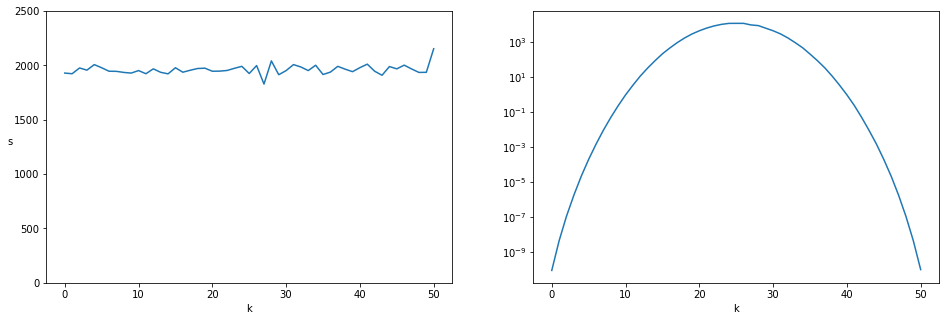

In [4]:
def uniform_sampling_rw(max_samples, max_length):
    
    """Produce multiple, max_length + 1 uniform distributions of an unbaised one-dimensional random walks 
    based on the total number of steps to the right.
    
    Parameters
    ----------
    max_length: maximum length of the walk
    max_samples: total number of samples
    
    Returns
    -------
    Two matrices:
    
    The square matrix s, where the k-th column is the number of steps to the right and the n-th row is 
    the total length of the random walk, both from 0 to max_length + 1. Each entry s[n,k] is the number of samples
    that took k steps to the right in a random walk of n steps.
    
    The w matrix, containing the corresponding weights for the sample entry s[n,k].
    """
    
    # Define the local biases for each s[n,k] samples of the random walk.
    p = lambda n,k:(k+1)/(n+2)
    # Store all of the local biases in a matrix.
    bias = np.fromfunction(p,(max_length+1,max_length+1))
    # Initialise two zero matrices, s and w
    # where each entry represents the number of samples with k step to the right
    # and w contains the corresponding weights.
    s = np.zeros((max_length+1,max_length+1))
    w = np.zeros((max_length+1,max_length+1))
    # Iterate over the number of stationary (n = 0) random walk samples with zero steps to the right (k = 0)
    # until in reaches the maximum number of samples.
    while s[0,0]<max_samples:
        s[0,0] += 1
        # Initialise n and k to represent the total length and total number of steps to the right, respectively.
        n = k = 0
        # Iterate over the corresponding weight of s[0,0] until the maximum number of samples is reached.
        weight = 1 
        w[0,0] += weight
        while n < max_length:
            # Generate a random number between 0 and 1.
            r = random.random()
            if r < bias[n,k]:
                # Correct the weights to counteract the bias p 
                # by a multiplicative factor of 0.5/bias[n,k] and move right.
                weight *= 0.5/bias[n,k]
                k += 1
            else:
                # If the condition doesn't hold, we multiply the weight
                # by 0.5/(1-bias[n,k]) and don't move to the right. 
                weight *= 0.5/(1-bias[n,k])
            n += 1
            # Fill the corresponding sample entry.
            # Add the calculated weight to the corresponding entry s[n,k].
            s[n,k] += 1; w[n,k] += weight
            
    return s,w

# example
max_samples,max_length = 10 ** 5,50
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
s,w = uniform_sampling_rw(max_samples, max_length)
ax1.plot(s[-1,:])
ax1.set_ylim([0,2500])
ax1.set_ylabel('s', rotation = 0)
ax1.set_xlabel('k')
ax2.plot(w[-1,:])
ax2.set_yscale("log")
ax2.set_xlabel('k')
plt.show()

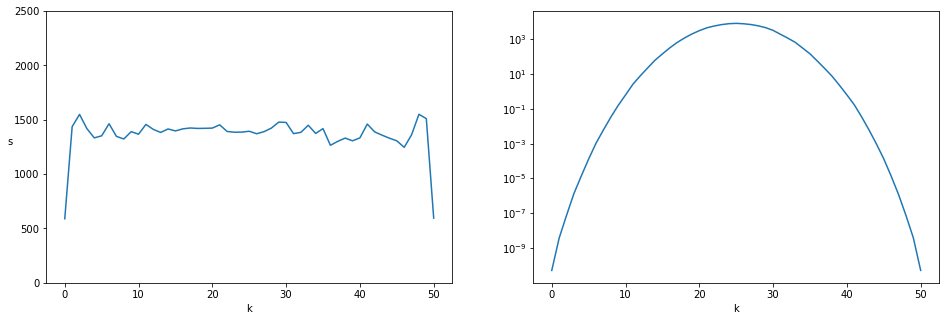

In [5]:
def perm_sampling_rw(max_samples, max_length, max_tours):
    
    """Produce multiple,max_length + 1, roughly uniform distributions of an unbaised one-dimensional random walks 
    based on the total number of steps to the right using the prune and enrichment method.
    
    Parameters
    ----------
    max_length: maximum length of the walk
    max_samples: total number of samples
    max_tours: maximum number of tours
    
    Returns
    -------
    Two matrices:
    
    The square matrix s, where the k-th column is the number of steps to the right and the n-th row is 
    the total length of the random walk, both from 0 to max_length + 1. Each entry s[n,k] is the number of samples
    that took k steps to the right in a random walk of n steps.
    
    The w matrix, containing the corresponding weights for the sample entry s[n,k].
    """
       
    # Assign target weights.
    target_weight = lambda n,k: (n+1)*sc.comb(n,k)/2**n
    W = np.fromfunction(target_weight,(max_length+1,max_length+1))
    # Initialise two zero matrices, s and w
    # where each entry represents the number of samples with k step to the right
    # and w contains the corresponding weights.
    s = np.zeros((max_length+1,max_length+1))
    w = np.zeros((max_length+1,max_length+1))
    # Initialise an empty list to represent the number of steps to the right.
    k = np.zeros(max_length+1,dtype=int)
    # Initialise a zero matrix whose entries represent the estimated weights
    # of each step of the walk with length n.
    weight = np.zeros(max_length+1)
    # Initialise a zero matrix whose entries represent the number of enrichment copies
    # of each step of the walk with length n.
    copy = np.zeros(max_length+1)
    tours = n = 0
    weight[0] = 1
    s[0,k[0]] += 1
    w[0,k[0]] += weight[0]
    # Iterate over the number of tours.
    while tours < max_tours:
        # If the maximal length has been reached, don't grow.
        if n == max_length:
            # Set the number of enrichment copies to zero.
            copy[n] = 0
        else:
            # Prune/enrich step by comparing with target weight.
            ratio = weight[n]/W[n,k[n]]
            p, r1 = ratio % 1, random.random()
            if r1 < p:
                copy[n] = np.floor(ratio) + 1
            else:
                copy[n] = np.floor(ratio)
            weight[n] = W[n,k[n]]    
        if copy[n] == 0: 
            # Shrink to last enrichment point or size to zero.
            while n > 0 and copy[n] == 0:
                n -= 1
        if n == 0 and copy[0] == 0:
            # If configuration shrunk to zero, start a new tour.
            tours += 1
            n = k[0] = 0
            weight[0] = 1
            s[n,k[n]] += 1
            w[n,k[n]] += weight[n]
        else:
            # Decrease the number of enrichment copies.
            copy[n] -= 1
            # Draw another random number between 0 and 1.
            r2 = random.random()
            if r2 < 1/2:
                # Grow by one step.
                k[n+1] = k[n] + 1
            else:
                k[n+1] = k[n]
            weight[n+1] = weight[n]
            n += 1
            # Fill the corresponding sample entry.
            # Add the calculated weight to the corresponding entry s[n,k].
            s[n,k[n]] += 1; w[n,k[n]] += weight[n]          
            
    return s,w

# example
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
max_samples,max_length,max_tours = 10 ** 5,50,70000
s,w = perm_sampling_rw(max_samples, max_length, max_tours)
ax1.plot(s[-1,:])
ax1.set_ylim([0,2500])
ax1.set_ylabel('s', rotation = 0)
ax1.set_xlabel('k')
ax2.plot(w[-1,:])
ax2.set_yscale("log")
ax2.set_xlabel('k')
plt.show()

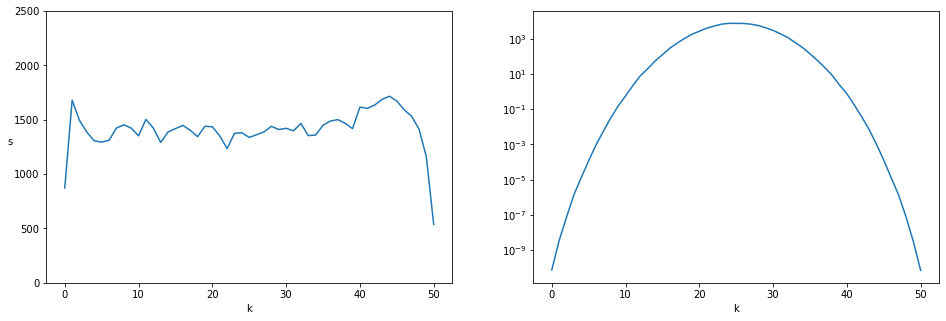

In [6]:
def blind_perm_sampling_rw(max_samples, max_length, max_tours):
    
    """Produce multiple, max_length + 1, roughly uniform distributions of unbaised one-dimensional random walks 
    based on the total number of steps to the right using the blind pruned and enrichment method.
    
    Parameters
    ----------
    max_length: maximum length of the walk
    max_samples: total number of samples
    max_tours: maximum number of tours
    
    Returns
    -------
    Two matrices:
    
    The square matrix s, where the k-th column is the number of steps to the right and the n-th row is 
    the total length of the random walk, both from 0 to max_length + 1. Each entry s[n,k] is the number of samples
    that took k steps to the right in a random walk of n steps.
    
    The w matrix, containing the corresponding weights for the sample entry s[n,k].
    """
      
    # Initialise an empty matrix whose entries represent estimated target weights.  
    W = np.zeros((max_length+1,max_length+1))
    # Initialise two zero matrices, s and w
    # where each entry represents the number of samples with k step to the right
    # and w contains the corresponding weights.
    s = np.zeros((max_length+1,max_length+1))
    w = np.zeros((max_length+1,max_length+1))
    # Initialise an empty list to represent the number of steps to the right.
    k = np.zeros(max_length+1,dtype=int)
    # Initialise a zero matrix whose entries represent the estimated weights
    # of each step of the walk with length n.
    weight = np.zeros(max_length+1)
    # Initialise a zero matrix whose entries represent the number of enrichment copies
    # of each step of the walk with length n.
    copy = np.zeros(max_length+1)
    tours = n = 0
    weight[0] = 1
    s[0,k[0]] += 1; w[0,k[0]] += weight[0]
    # Iterate over the number of tours.
    while tours < max_tours:
        # If the maximal length has been reached, don't grow.
        if n == max_length:
            # Set the number of enrichment copys to zero.
            copy[n] = 0
        else:
            # Prune/enrich step by comparing with the estimated target weight.
            W[n,k[n]] = (n+1)*w[n,k[n]]/np.sum(w[n,:])
            ratio = weight[n]/W[n,k[n]]
            p, r1 = ratio % 1, random.random()
            if r1 < p:
                copy[n] = np.floor(ratio) + 1
            else:
                copy[n] = np.floor(ratio)
            weight[n] = W[n,k[n]]    
        if copy[n] == 0: 
            # Shrink to last enrichment point or size to zero.
            while n > 0 and copy[n] == 0:
                n -= 1
        if n == 0 and copy[0] == 0:
            # If configuration shrunk to zero, start a new tour.
            tours += 1
            n = k[0] = 0
            weight[0] = 1
            s[n,k[n]] += 1; w[n,k[n]] += weight[n]
        else:
            # Decrease the number of enrichment copies.
            copy[n] -= 1
            # Draw another random number between 0 and 1.
            r2 = random.random()
            if r2 < 1/2:
                # Grow by one step.
                k[n+1] = k[n] + 1
            else:
                k[n+1] = k[n]
            weight[n+1] = weight[n]
            n += 1
            # Fill the corresponding sample entry.
            # Add the calculated weight to the corresponding entry s[n,k].
            s[n,k[n]] += 1; w[n,k[n]] += weight[n]
            
    return s,w

# example
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
max_samples,max_length,max_tours = 10 ** 5,50,70000
s,w = blind_perm_sampling_rw(max_samples, max_length, max_tours)
ax1.plot(s[-1,:])
ax1.set_ylim([0,2500])
ax1.set_ylabel('s', rotation = 0)
ax1.set_xlabel('k')
ax2.plot(w[-1,:])
ax2.set_yscale("log")
ax2.set_xlabel('k')
plt.show()

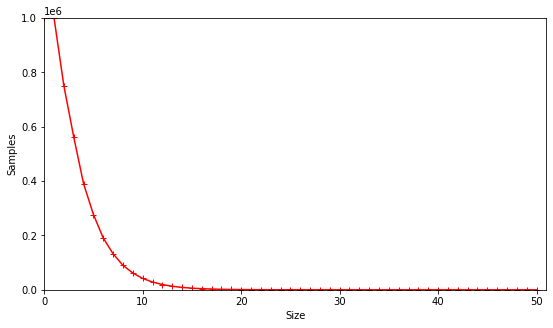

In [7]:
def simple_sampling_saw(max_samples,max_length):

    """Produce an exponential distribution of a two-dimensional self-avoiding walk based on
    the total length of the walk.
   
   Parameters
   ----------
   max_length: maximum length of the walk
   max_samples: total number of samples
   
   Returns
   -------
   
   A list where each entry s[n] represents how many samples are of length n, 
   from n = 0 to n = max_length + 1.  
    """
    
    # Initialise a zero list to represent the number of samples.
    s, *steps = np.zeros(max_length+1), [1,0],[-1,0],[0,1],[0,-1]
    # Iterate over the total number of samples of length zero.
    while s[0] < max_samples:
        n, site = 0, (0,0)
        s[0] += 1
        occupied_sites = [site]
        while n < max_length:
            # Draw one of the neighbouring sites uniformly at random.
            step = random.choice(steps)
            site = tuple(i+j for i,j in zip(site,step))
            # If occupied, reject walk and exit loop.
            if site in occupied_sites:
                break
            else:
                # Step to new site.
                occupied_sites.append(site)
                n += 1
                s[n] += 1
    
    return s

# example
max_samples, max_length = 10 ** 6, 50
s = simple_sampling_saw(max_samples,max_length)
plt.figure(figsize=(9, 5))
plt.xlabel('Size')
plt.ylabel('Samples')
plt.plot(s,'-+r')
plt.xlim([0, max_length+1])
plt.ylim([0, max(s)])
plt.show()

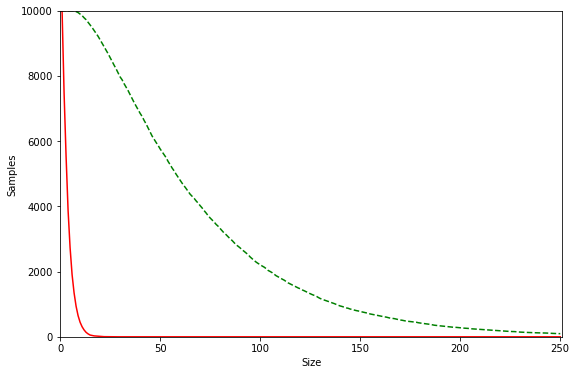

In [8]:
def rosenbluth_sampling_saw(max_samples,max_size):
    
    """Produce an exponential distribution of a two-dimensional self-avoiding walk based on
    the total size of the walk using the Rosenbluth sampling method.
   
   Parameters
   ----------
   max_size: maximum size of the walk
   max_samples: total number of samples
   
   Returns
   -------
   
   Two lists s and w where each entry of s, s[n], represents how many samples are of at least size n, 
   from n = 0 to n = max_size + 1 and the entries of w, w[n], the corresponding weights.
    """

    # Initialise a zero list to represent the number of samples.
    s,w = np.zeros(max_size+1),np.zeros(max_size+1)
    # Iterate over the total number of samples of at least size zero.
    while s[0] < max_samples:
        n, weight = 0, 1
        s[0] += 1; w[0] += weight
        # Start at origin.
        site = (0,0)
        occupied_sites, *steps = [site], [1,0],[-1,0],[0,1],[0,-1]
        # Create list of neighbouring unoccupied sites, determine the atmosphere a.
        while n < max_size:
            unoccupied_sites = []
            for step in steps:
                new_step = tuple(i+j for i,j in zip(site,step))
                if new_step not in occupied_sites:
                    unoccupied_sites.append(new_step)
            a = len(unoccupied_sites)
            # If walk cannot continue, reject entire walk and exit loop.
            if a == 0:
                break
            else:
                # Draw one of the neighbouring unoccupied sites uniformly at random.
                # Step to new site.
                site = random.choice(unoccupied_sites)
                occupied_sites.append(site)
                n += 1
                weight *= a
                s[n] += 1; w[n] += weight
                del unoccupied_sites

    return s,w

# example (comparing rosenbluth sampling to simple sampling.)
max_samples, max_size = 10 ** 4, 250
s,w = rosenbluth_sampling_saw(max_samples,max_size)
s_simple = simple_sampling_saw(max_samples,max_size)
plt.figure(figsize=(9, 6))
plt.xlabel('Size')
plt.ylabel('Samples')
plt.plot(s,'--g')
plt.plot(s_simple, 'r')
plt.xlim([0, max_size+1])
plt.ylim([0, max(s)])
plt.show()

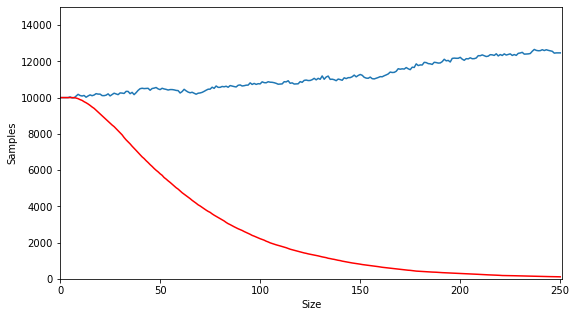

In [9]:
def perm_sampling_saw(max_size,max_tours):
    
    """Produce a roughly uniform distribution of a two-dimensional self-avoiding walk based on
    the total size and number of tours of the walk using the Pruned and enrichment sampling method.
   
   Parameters
   ----------
   max_size: maximum size of the walk
   max_samples: total number of samples
   
   Returns
   -------
   
   Two lists s,w where each entry of s, s[n], represents how many samples are of at least size n, 
   from n = 0 to n = max_size + 1 and the entries of w, the corresponding weights.
    """
    
    s = np.zeros(max_size+1)
    w = np.zeros(max_size+1)
    copy = np.zeros(max_size+1)
    weight = np.zeros(max_size+1)
    tours = n = 0
    # Start new walk at origin and step size zero.
    a = copy[0] = weight[0] = 1
    s[0] += 1; w[0] += weight[0]
    site = (0,0)
    occupied_sites,*steps = [site], [1,0],[-1,0],[0,1],[0,-1]
    while tours < max_tours:
        unoccupied_sites = []
        # If maximal length has been reached or the atmosphere is zero: Don't grow.
        if n == max_size or a == 0:
            copy[n] = 0
        else:
            # Pruning/enrichment by comparing with target weight with the normalised weight estimate.
            ratio = weight[n]/(w[n]/s[0])
            p, r = ratio % 1, random.random()
            # Generate a random number between 0 and 1
            if r < p:
                copy[n] = np.floor(ratio) + 1
            else:
                copy[n] = np.floor(ratio)
            weight[n] = w[n]/s[0]
        if copy[n] == 0:
            while n > 0 and copy[n] == 0:
                # Delete last site of walk.
                occupied_sites = occupied_sites[:-1] 
                site = occupied_sites[-1]
                n -= 1
        if n == 0 and copy[0] == 0:
            # Start new tour.
            tours += 1
            # Start new walk with step size zero.
            a, copy[0] = 1, 1
            s[0] += 1; w[0] += weight[0]
            site = (0,0)
            occupied_sites, unoccupied_sites, *steps = [site], [], [1,0],[-1,0],[0,1],[0,-1]
        else:
            # Create list of neighboring unoccupied sites, determine the atmosphere a.
            for step in steps:
                new_step = tuple(i+j for i,j in zip(site,step))
                if new_step not in occupied_sites:
                    unoccupied_sites.append(new_step)
            a = len(unoccupied_sites)
            # If the walk cannot continue, reject entire walk and exit loop.
            if a > 0:
                copy[n] -= 1
                # Draw one of the neighbouring unoccupied sites uniformly at random.
                # Step to new site.
                site = random.choice(unoccupied_sites)
                occupied_sites.append(site)
                n += 1
                weight[n] = weight[n-1]*a
                s[n] += 1; w[n] += weight[n]
                del unoccupied_sites            
    s[0] -= 1; w[0] -= 1
    
    return s,w/s[0]

# examlpe (comparing PERM to rosenbluth sampling)
max_samples, max_size, max_tours = 10 ** 4 ,250, 10 ** 4
s,w = perm_sampling_saw(max_size,max_tours)
s_rosenbluth, w = rosenbluth_sampling_saw(max_samples,max_size)
plt.figure(figsize=(9, 5))
plt.plot(s)
plt.plot(s_rosenbluth, 'r')
plt.xlabel('Size')
plt.ylabel('Samples')
plt.xlim([0, max_size+1])
plt.ylim([0, max_tours*1.5])
plt.show()